In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report, confusion_matrix

In [2]:
import os
path = os.listdir('C:/Users/MUKESH KUMAR/Desktop/minor2/project/training')
classes = {'car':0, 'man':1 ,'cat':2}

In [3]:
import cv2
x=[]
y=[]
for cls in classes:
    pth = 'C:/Users/MUKESH KUMAR/Desktop/minor2/project/training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)
        img = cv2.resize(img, (200,200))
        x.append(img)
        y.append(classes[cls])

In [4]:
x=np.array(x)
y=np.array(y)

In [5]:
# pd.Series(y).value_counts()

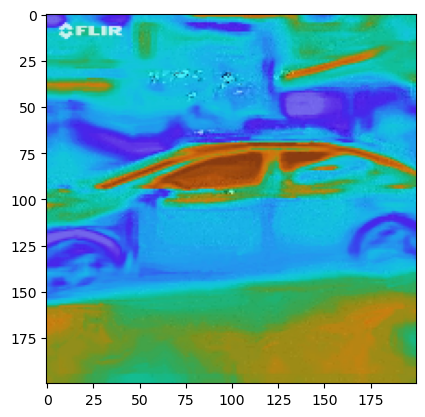

In [6]:
plt.imshow(x[0], cmap='gray')

In [7]:
x_updated = x.reshape(len(x), -1)
x_updated.shape
xtrain, xtest, ytrain, ytest = train_test_split(x_updated, y, random_state=10, test_size=.20)

In [8]:
# xtrain.shape, xtest.shape

In [9]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [10]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)

pca_train = xtrain
pca_test = xtest

(153, 120000) (39, 120000)


In [11]:
from sklearn.svm import SVC
sv = SVC(kernel='poly')
sv.fit(pca_train, ytrain)
pred = sv.predict(pca_test)
np.where(ytest!=pred)
y_pred = sv.predict(pca_test)
print("training score:", sv.score(pca_train, ytrain))
print("testing score:", sv.score(pca_test, ytest))

training score: 1.0
testing score: 0.8205128205128205


In [12]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='macro')
recall = recall_score(ytest, y_pred, average='macro')
f1 = f1_score(ytest, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))


Accuracy: 82.05%
Precision: 83.20%
Recall: 81.56%
F1-score: 81.55%


In [13]:
print('Classification Report:\n', classification_report(ytest, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.75      0.92      0.83        13
           2       0.89      0.67      0.76        12

    accuracy                           0.82        39
   macro avg       0.83      0.82      0.82        39
weighted avg       0.83      0.82      0.82        39



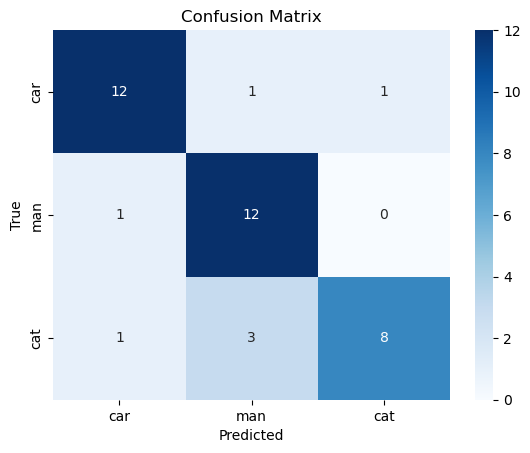

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
unique_labels = np.unique(np.concatenate((ytest, y_pred)))
label_dict = {label: str(label) for label in unique_labels}
label_dict[0] = 'car'
label_dict[1] = 'man'
label_dict[2] = 'cat'

# convert numeric labels to string labels
ytest_str = np.array([label_dict[y] for y in ytest])
y_pred_str = np.array([label_dict[y] for y in y_pred])

# create confusion matrix
cm = confusion_matrix(ytest_str, y_pred_str, labels=['car', 'man', 'cat'])

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['car', 'man', 'cat'], yticklabels=['car', 'man', 'cat'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# convert numeric labels to string labels

# create classification report
print('Classification Report:\n', classification_report(ytest_str, y_pred_str))



Classification Report:
               precision    recall  f1-score   support

         car       0.86      0.86      0.86        14
         cat       0.89      0.67      0.76        12
         man       0.75      0.92      0.83        13

    accuracy                           0.82        39
   macro avg       0.83      0.82      0.82        39
weighted avg       0.83      0.82      0.82        39



In [16]:
# load input image
img = cv2.imread('C:/Users/MUKESH KUMAR/Desktop/minor2/project/testing/flir_20200312T125503.jpg')

# preprocess input image
img = cv2.resize(img, (200, 200))
img = img.flatten()

# apply PCA
pca_img =img.reshape(1, -1)

# make predictions
pred = sv.predict(pca_img)
label = {0:'car', 1:'man', 2:'cat'}

# print predicted label
print('Predicted label:', label[pred[0]])


Predicted label: cat


In [17]:

# Load SVM model and define label mapping
#sv = svm_load_model('svm_model_file.svm')  # Replace with the path to your SVM model file
label_mapping = {0: 'car', 1: 'man', 2: 'cat'}

# Path to the folder containing the test images
folder_path = 'C:/Users/MUKESH KUMAR/Desktop/minor2/project/testing'

# Loop through each image file in the folder
for filename in os.listdir(folder_path):
    # Load the image
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    
    # Preprocess input image
    img = cv2.resize(img, (200, 200))
    img = img.flatten()
    pca_img = img.reshape(1, -1)

    # Make prediction
    pred = sv.predict(pca_img)

    # Get predicted label
    predicted_label = label_mapping[pred[0]]

    # Print the predicted label for the current image
    print(f'Image: {filename}, Predicted label: {predicted_label}')


Image: flir_20200104T125347 (2).jpg, Predicted label: man
Image: flir_20200104T125415.jpg, Predicted label: man
Image: flir_20200104T125439 (2).jpg, Predicted label: man
Image: flir_20200104T125451.jpg, Predicted label: man
Image: flir_20200116T174848.jpg, Predicted label: car
Image: flir_20200116T174853.jpg, Predicted label: car
Image: flir_20200116T174857.jpg, Predicted label: car
Image: flir_20200116T174911.jpg, Predicted label: car
Image: flir_20200116T174913.jpg, Predicted label: car
Image: flir_20200116T174921 (2).jpg, Predicted label: car
Image: flir_20200116T174921.jpg, Predicted label: car
Image: flir_20200116T174924 (2).jpg, Predicted label: car
Image: flir_20200116T174924.jpg, Predicted label: car
Image: flir_20200116T174930 (2).jpg, Predicted label: car
Image: flir_20200116T174931 (2).jpg, Predicted label: car
Image: flir_20200116T174931.jpg, Predicted label: car
Image: flir_20200116T174949.jpg, Predicted label: car
Image: flir_20200116T174951 (2).jpg, Predicted label: car
